In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
import sys
import os
import tensorflow as tf

2022-07-21 08:48:02.078225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/feyzi/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-07-21 08:48:02.078248: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(200, 200, 3)
[0]


/tmp/ipykernel_21191/2481991993.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  some_random_image_opencv_label = np.ndarray(shape=(1,), dtype=np.int)


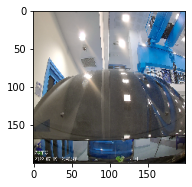

In [49]:
some_random_image_opencv = cv2.imread("photos_common_directory/no20220719-124848-000001fframe0.jpg", cv2.IMREAD_COLOR)
some_random_image_opencv = cv2.resize(some_random_image_opencv, (200,200))
print(some_random_image_opencv.shape)
some_random_image_opencv_label = np.ndarray(shape=(1,), dtype=np.int)
some_random_image_opencv_label.fill(0)
print(some_random_image_opencv_label)
cv2.imshow("Some image", some_random_image_opencv)
some_key = cv2.waitKey(0)
if some_key == ord("q"):
    cv2.destroyAllWindows()
else:
    while some_key != ord("q"):
        cv2.imshow("Some image", some_random_image_opencv)
        some_key = cv2.waitKey(0)
        if some_key == ord("q"):
            cv2.destroyAllWindows()
            break
some_random_image_opencv_color_converted = cv2.cvtColor(some_random_image_opencv, cv2.COLOR_BGR2RGB)
cv2.imshow("Some image color converted", some_random_image_opencv_color_converted)
some_key = cv2.waitKey(0)
if some_key == ord("q"):
    cv2.destroyAllWindows()
else:
    while some_key != ord("q"):
        cv2.imshow("Some image color converted", some_random_image_opencv_color_converted)
        some_key = cv2.waitKey(0)
        if some_key == ord("q"):
            cv2.destroyAllWindows()
            break
np.save("some_random_image_opencv_numpy_file.npy", some_random_image_opencv, allow_pickle=True)
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(some_random_image_opencv)

In [50]:
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))): # if value ist tensor
        value = value.numpy() # get value of tensor
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a floast_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def serialize_array(array):
    array = tf.io.serialize_tensor(array)
    return array

def parse_single_image(image, label):

    #define the dictionary -- the structure -- of our single example
    data = {
        'height' : _int64_feature(image.shape[0]),
        'width' : _int64_feature(image.shape[1]),
        'depth' : _int64_feature(image.shape[2]),
        'raw_image' : _bytes_feature(serialize_array(image)),
        'label' : _int64_feature(label)
    }
    #create an Example, wrapping the single features
    out = tf.train.Example(features=tf.train.Features(feature=data))

    return out

def write_images_to_tfr_short(images, labels, filename:str="images"):
    filename= filename+".tfrecords"
    writer = tf.io.TFRecordWriter(filename) #create a writer that'll store our data to disk
    count = 0

    for index in range(len(images)):

        #get the data we want to write
        current_image = images[index]
        current_label = labels[index]

        out = parse_single_image(image=current_image, label=current_label)
        writer.write(out.SerializeToString())
        count += 1

    writer.close()
    print(f"Wrote {count} elements to TFRecord")
    return count

In [51]:
some_random_image_opencv_loaded = np.load("some_random_image_opencv_numpy_file.npy", allow_pickle=True)

In [52]:
cv2.imshow("Some image reloaded", some_random_image_opencv_loaded)
some_key = cv2.waitKey(0)
if some_key == ord("q"):
    cv2.destroyAllWindows()
else:
    while some_key != ord("q"):
        cv2.imshow("Some image reloaded", some_random_image_opencv_loaded)
        some_key = cv2.waitKey(0)
        if some_key == ord("q"):
            cv2.destroyAllWindows()
            break

In [53]:
some_random_image_opencv = np.reshape(some_random_image_opencv, (1, 200, 200, 3))
count = write_images_to_tfr_short(some_random_image_opencv, some_random_image_opencv_label, filename="small_images")

Wrote 1 elements to TFRecord


In [9]:
a = np.zeros((10, 2))

In [10]:
b = a.T

In [11]:
c = b.view()

In [12]:
print(type(c))

<class 'numpy.ndarray'>


In [16]:
some_copy = c.reshape(4,5)

In [8]:
print(b)
print(c)

[[ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [4]:
tf.config.list_physical_devices('GPU')

[]